## Observations and Insights 

In [1]:
!pip install scipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')
# Display the data table for preview

combined_data.head(7)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1


In [2]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
drop_mouseid = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

combined_data_cleaned = combined_data[combined_data['Mouse ID'].isin(drop_mouseid)==False]

combined_data_cleaned.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
drop_mouseid

array(['g989'], dtype=object)

In [5]:
combined_data_cleaned['Mouse ID'].value_counts()

z795    10
z581    10
m546    10
l725    10
r604    10
        ..
v199     1
x336     1
d133     1
u153     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': stdv, 'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

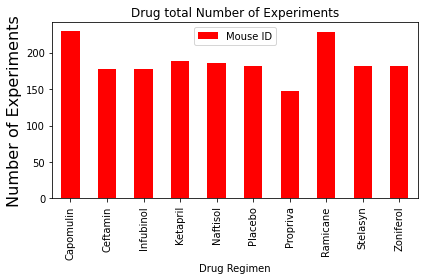

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_measurements = pd.DataFrame(combined_data_cleaned.groupby(['Drug Regimen']).count()).reset_index()
drug_df = drug_measurements[['Drug Regimen', 'Mouse ID']]
drug_df = drug_df.set_index('Drug Regimen')
drug_df.plot(kind='bar', color = 'red')
plt.title('Drug total Number of Experiments')
plt.legend(loc='best')
plt.ylabel('Number of Experiments', fontsize = 16)
plt.tight_layout()
plt.show()




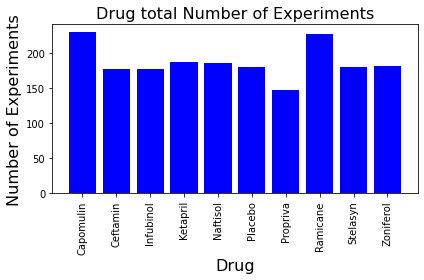

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
         'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
         'Stelasyn', 'Zoniferol']
drugs_count = combined_data_cleaned.groupby(['Drug Regimen']).count()
drugs_count = drugs_count['Mouse ID'].tolist()
x_axis = drugs

plt.figure()
plt.bar(x_axis, drugs_count, color='blue', align='center')
plt.title('Drug total Number of Experiments', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel('Drug', fontsize = 16)
plt.ylabel('Number of Experiments', fontsize = 16)
plt.tight_layout()
plt.show()




In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_data_cleaned.groupby(['Sex']).count()).reset_index()
gender_df = gender_df[['Sex', 'Mouse ID']]
gender_df



,Sex,Mouse ID
0,Female,922
1,Male,958


<Figure size 432x288 with 0 Axes>

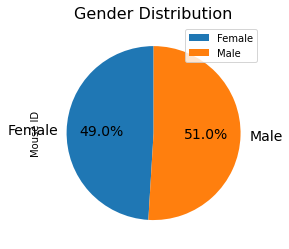

In [11]:
plt.figure()
gender_df.plot(kind='pie', y = 'Mouse ID', autopct='%1.1f%%',
              startangle=90, shadow=False,legend = True, labels=gender_df['Sex'], fontsize=14)
plt.title('Gender Distribution', fontsize = 16)
plt.axis = 'equal'
plt.tight_layout
plt.show()

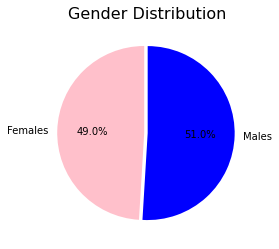

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df2 = combined_data_cleaned.groupby(['Sex']).count()
gender_df2 = gender_df2['Mouse ID'].tolist()
labels = ['Females', 'Males']
colors = ['pink', 'blue']
explode = (0.04, 0)
plt.pie(gender_df2, startangle=90, autopct='%1.1f%%', colors = colors, labels = labels, explode = explode)
plt.axis = 'equal'
plt.title('Gender Distribution', fontsize = 16)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
